In [10]:
import sys
sys.path.insert(0, "../..")

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

from module.base.network import Network
from module.simulation.meanfield import MeanField
from module.simulation.quick_meanfield2 import QuickMeanField2
import module.components.CONST as CONST
def set_size(width = "thesis", fraction=1, subplots=(1, 1)):
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

/tmp/ipykernel_635/2438921647.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [140]:
def get_data(w):
    w = np.floor(2 * w) / 2
    dt = 1/w * 2 * np.pi / 250
    ts = np.loadtxt("../../data/time_dep/oscil/ts_w="+str(w)+".csv")

    N = ts.shape[0]
    n = int(N/2)
    ts = ts[n:]

    Us = np.loadtxt("../../data/time_dep/oscil/Us_w="+str(w)+".csv")[n:]

    #MF1
    mf_currents = np.loadtxt("../../data/time_dep/oscil/mf_currents_w="+str(w)+".csv")[n:]
    mf_means = np.loadtxt("../../data/time_dep/oscil/mf_means_w="+str(w)+".csv")[n:]

    #MF2
    qmf2_currents = np.loadtxt("../../data/time_dep/oscil/qmf2_currents_w="+str(w)+".csv")[n:]
    qmf2_means = np.loadtxt("../../data/time_dep/oscil/qmf2_means_w="+str(w)+".csv")[n:]
    qmf2_vars = np.loadtxt("../../data/time_dep/oscil/qmf2_vars_w="+str(w)+".csv")[n:]

    return ((ts, Us, w, dt), (mf_means, mf_currents), (qmf2_means, qmf2_vars, qmf2_currents))

## Analysis

In [149]:
(ts, Us, w, dt), (mf_means, mf_currents), (qmf2_means, qmf2_vars, qmf2_currents) = get_data(20)

## Time Plots

Text(0.5, 0.98, 'Oscillations for $\\omega = 1.0$GHz')

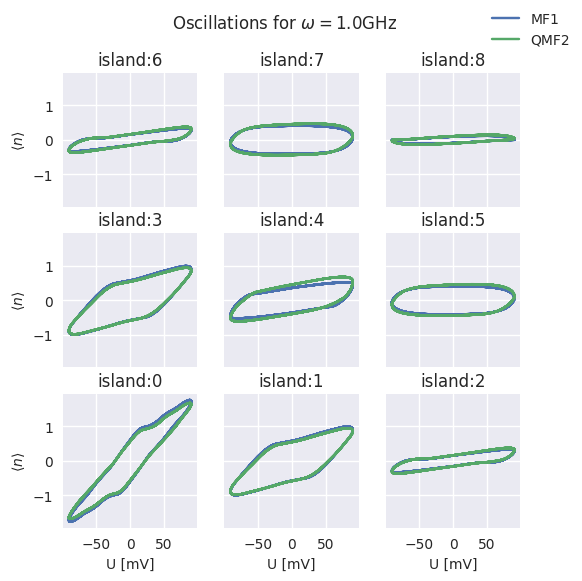

In [142]:
f, axs = plt.subplots(3, 3, figsize=(set_size()[0], set_size()[0]), sharex=True, sharey=True)

for i in range(3):
    for j in range(3):
        if i==0 and j ==0:
            axs[2-j,i].plot(Us*1000, mf_means[:, i+3*j], label = "MF1")
            axs[2-j,i].plot(Us*1000, qmf2_means[:, i + 3*j], label = "QMF2")
            axs[2-j,i].set_title("island:"+ str(i+3*j))
        else:
            axs[2-j,i].plot(Us*1000, mf_means[:, i+3*j])
            axs[2-j,i].plot(Us*1000, qmf2_means[:, i + 3*j])
            axs[2-j,i].set_title("island:"+ str(i+3*j))


axs[2,0].set_xlabel("U [mV]")
axs[2,1].set_xlabel("U [mV]")
axs[2,2].set_xlabel("U [mV]")
axs[0,0].set_ylabel("$\\langle n \\rangle$")
axs[1,0].set_ylabel("$\\langle n \\rangle$")
axs[2,0].set_ylabel("$\\langle n \\rangle$")
f.legend()
f.suptitle("Oscillations for $\\omega = "+str(w)+"$GHz")


Text(0.5, 0.98, 'Oscillations for $\\omega = 1.0$GHz')

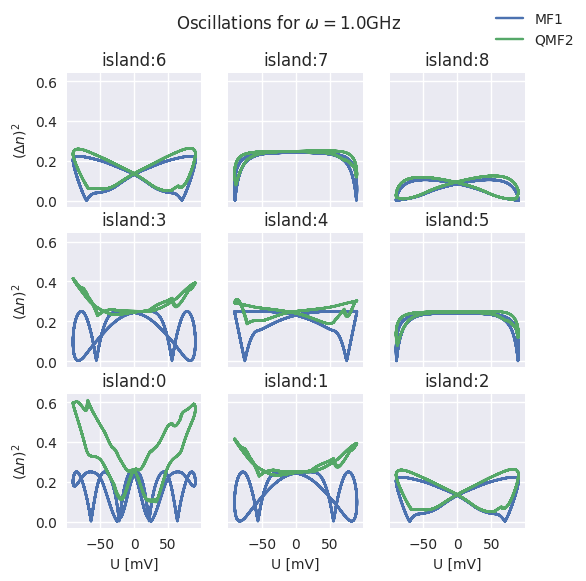

In [143]:
f, axs = plt.subplots(3, 3, figsize=(set_size()[0], set_size()[0]), sharex=True, sharey=True)

for i in range(3):
    for j in range(3):
        if i==0 and j ==0:
            d = mf_means[:, i+3*j] - np.floor(mf_means[:, i+3*j])
            axs[2-j,i].plot(Us*1000, d * (1 - d), label = "MF1")
            axs[2-j,i].plot(Us*1000, qmf2_vars[:, i + 3*j], label = "QMF2")
            axs[2-j,i].set_title("island:"+ str(i+3*j))
        else:
            d = mf_means[:, i+3*j] - np.floor(mf_means[:, i+3*j])
            axs[2-j,i].plot(Us*1000, d * (1 - d))
            axs[2-j,i].plot(Us*1000, qmf2_vars[:, i + 3*j])
            axs[2-j,i].set_title("island:"+ str(i+3*j))


axs[2,0].set_xlabel("U [mV]")
axs[2,1].set_xlabel("U [mV]")
axs[2,2].set_xlabel("U [mV]")
axs[0,0].set_ylabel("$(\\Delta n)^2$")
axs[1,0].set_ylabel("$(\\Delta n)^2$")
axs[2,0].set_ylabel("$(\\Delta n)^2$")
f.legend()
f.suptitle("Oscillations for $\\omega = "+str(w)+"$GHz")


Text(0.5, 0.98, 'Oscillations for $\\omega = 1.0$GHz')

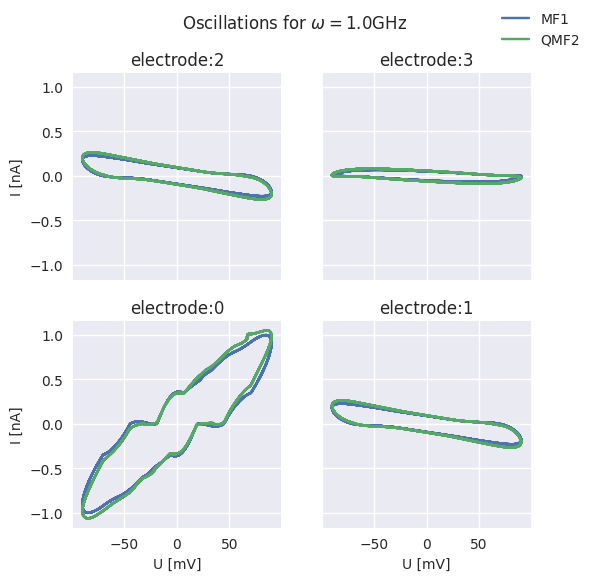

In [144]:
f, axs = plt.subplots(2, 2, figsize=(set_size()[0], set_size()[0]), sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        if i==0 and j ==0:
            axs[1-j,i].plot(Us*1000, mf_currents[:, i+2*j], label = "MF1")
            axs[1-j,i].plot(Us*1000, qmf2_currents[:, i + 2*j], label = "QMF2")
            axs[1-j,i].set_title("electrode:"+ str(i+2*j))
        else:
            axs[1-j,i].plot(Us*1000, mf_currents[:, i+2*j])
            axs[1-j,i].plot(Us*1000, qmf2_currents[:, i + 2*j])
            axs[1-j,i].set_title("electrode:"+ str(i+2*j))


axs[1,0].set_xlabel("U [mV]")
axs[1,1].set_xlabel("U [mV]")
axs[0,0].set_ylabel("I [nA]")
axs[1,0].set_ylabel("I [nA]")
f.legend()
f.suptitle("Oscillations for $\\omega = "+str(w)+"$GHz")


## Fourier Analysis

In [150]:
def fft(signal):
    n_0 = int(signal.shape[-1] / 2)
    signal_fft = np.fft.fft(signal)
    freq = np.fft.fftfreq(signal.shape[-1]) / dt * 2 * np.pi

    return freq[0:n_0], signal_fft[0:n_0]

def fft_amp(signal):
    n_0 = int(signal.shape[-1] / 2)
    signal_fft = np.fft.fft(signal)
    freq = np.fft.fftfreq(signal.shape[-1]) / dt * 2 * np.pi

    return freq[0:n_0], np.abs(signal_fft[0:n_0])

def fft_phase(signal):
    n_0 = int(signal.shape[-1] / 2)
    signal_fft = np.fft.fft(signal)
    freq = np.fft.fftfreq(signal.shape[-1]) / dt * 2 * np.pi

    return freq[0:n_0], np.angle(signal_fft[0:n_0])

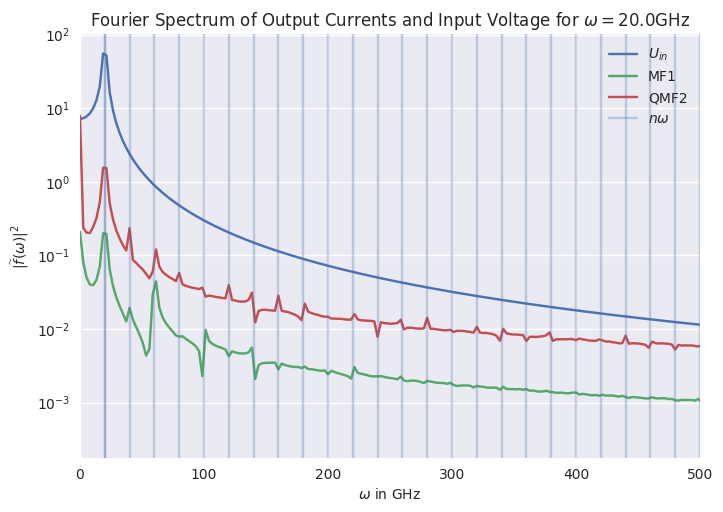

In [155]:
freq, U_fft = fft(Us)
U_amp = np.abs(U_fft)
U_phase = np.angle(U_fft)

current = 1

freq, qmf2_current_fft = fft(qmf2_currents[:, current])
qmf2_current_amp = np.abs(qmf2_current_fft)
qmf2_current_phase = np.angle(qmf2_current_fft)

freq, mf_current_fft = fft(mf_currents[:, current])
mf_current_amp = np.abs(mf_current_fft)
mf_current_phase = np.angle(mf_current_fft)


plt.plot(freq, U_amp, label = "$U_{in}$")
plt.plot(freq, mf_current_amp, label = "MF1")
plt.plot(freq, qmf2_current_amp, label = "QMF2")

plt.axvline(w, alpha = 0.3, label = "$n\\omega$")
for i in range(1, 50):
    plt.axvline(i*w, alpha = 0.3)



plt.legend()
plt.yscale("log")

plt.xlabel("$\\omega$ in GHz")
plt.ylabel("$|\widetilde f(\\omega)|^2$")

plt.xlim(0, 500)

plt.title("Fourier Spectrum of Output Currents and Input Voltage for $\\omega = "+str(w)+"$GHz")
plt.savefig("../../output/time_dependence/fourier_quick.pdf")

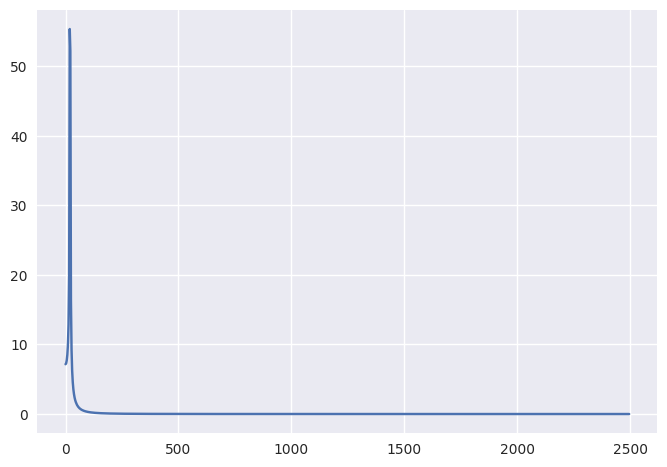

In [157]:
plt.plot(freq, U_amp)

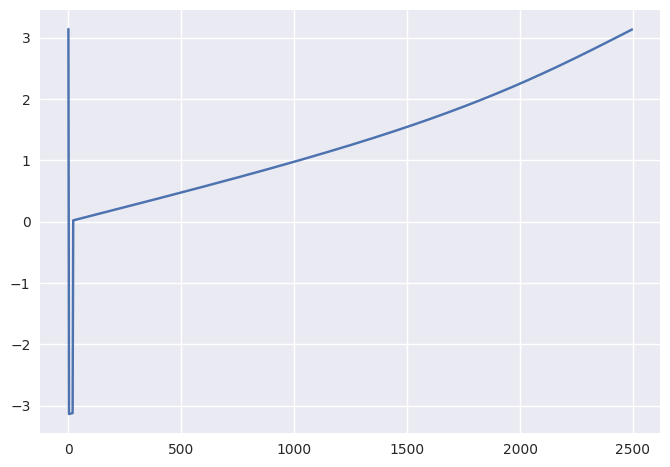

In [158]:
plt.plot(freq, U_phase)